In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer


In [2]:
# Load the data
data = pd.read_csv('googleplaystore.csv')


In [3]:
# Check for null values in the data
print(data.isnull().sum())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [4]:
# Drop records with nulls in any of the columns
data.dropna(inplace=True)


In [5]:
# Fix data types and formatting
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1000
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return np.nan

data['Size'] = data['Size'].map(convert_size)

data['Reviews'] = data['Reviews'].astype(int)


In [6]:
# Handle 'Installs' column
data['Installs'] = data['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '')))


In [7]:
# Handle 'Price' column
data['Price'] = data['Price'].apply(lambda x: float(x.replace('$', '')))


In [8]:
# Handle 'Type' column by encoding it to 0 (Free) or 1 (Paid)
data['Type'] = data['Type'].apply(lambda x: 0 if x == 'Free' else 1)


In [9]:
# Sanity checks
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]
data = data[data['Reviews'] <= data['Installs']]
data = data[~((data['Type'] == 0) & (data['Price'] > 0))]


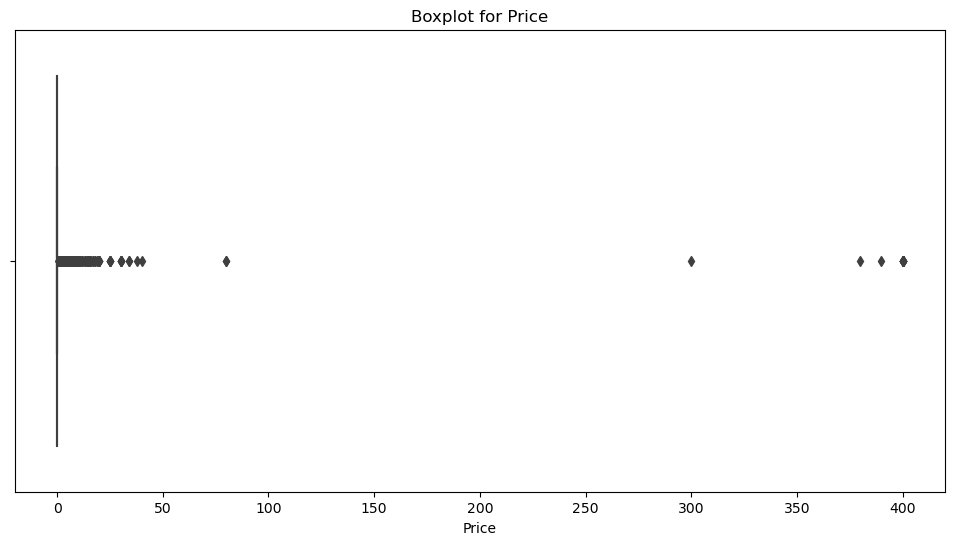

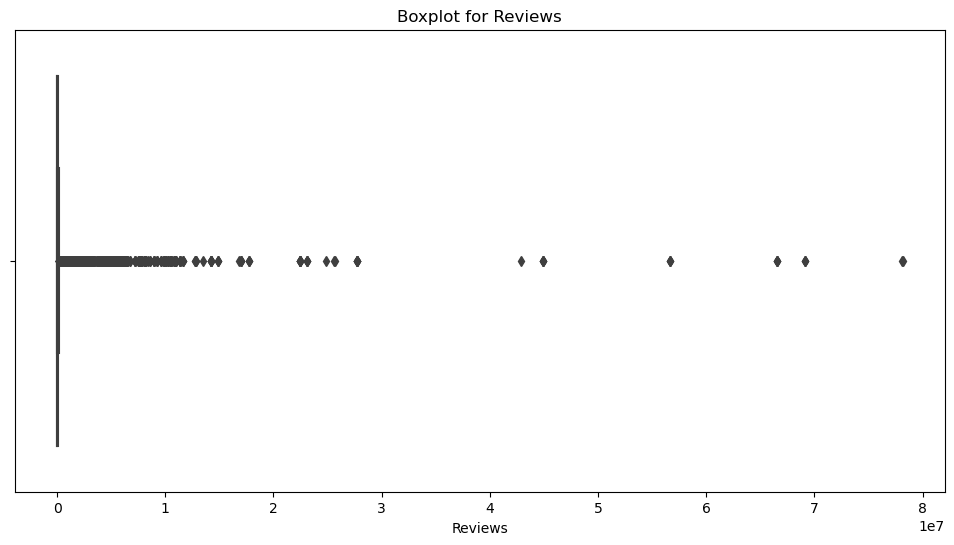

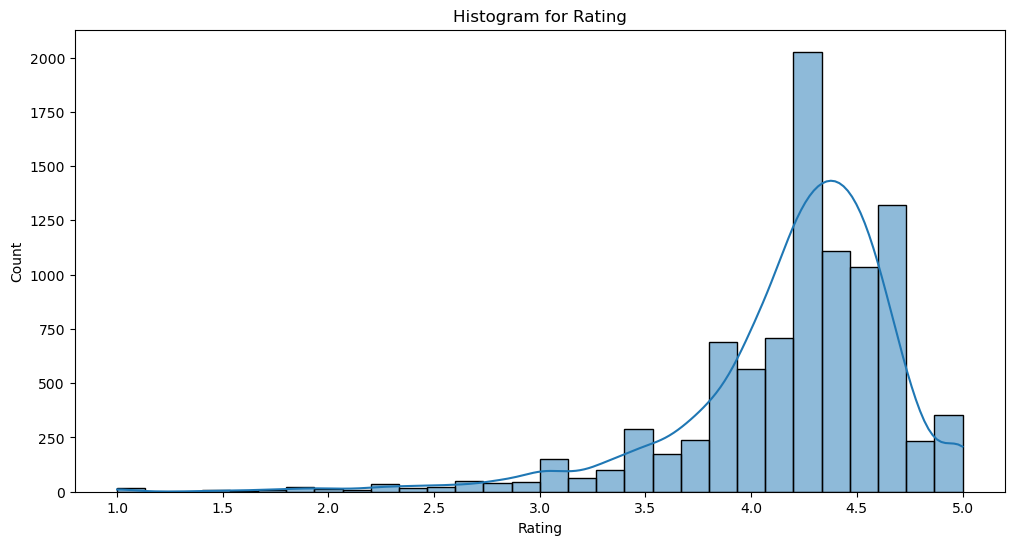

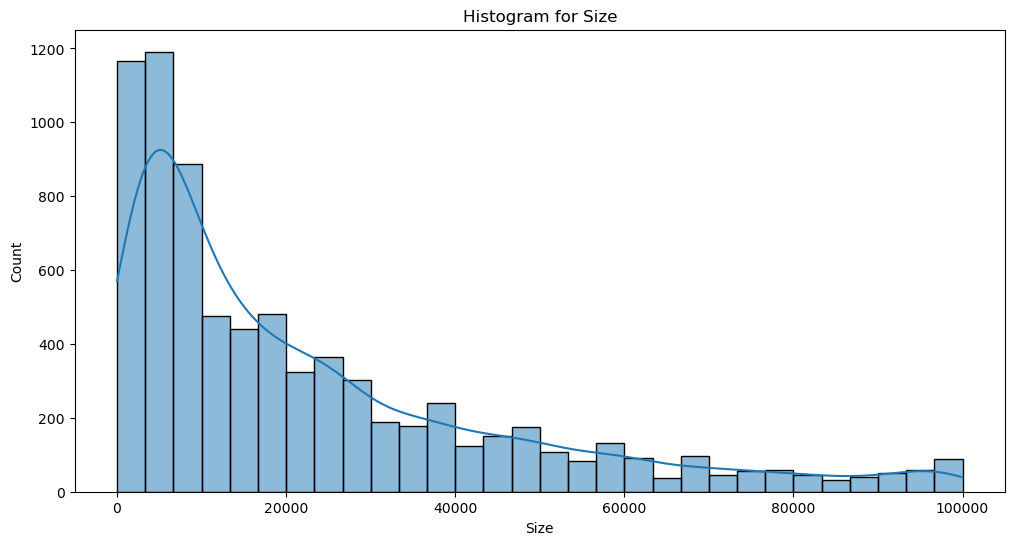

In [10]:
# Univariate analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', data=data)
plt.title('Boxplot for Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Reviews', data=data)
plt.title('Boxplot for Reviews')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Histogram for Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Size'], bins=30, kde=True)
plt.title('Histogram for Size')
plt.show()


In [11]:

# Outlier treatment
data = data[data['Price'] < 200]
data = data[data['Reviews'] <= 2000000]
data = data[data['Installs'] <= data['Installs'].quantile(0.99)]


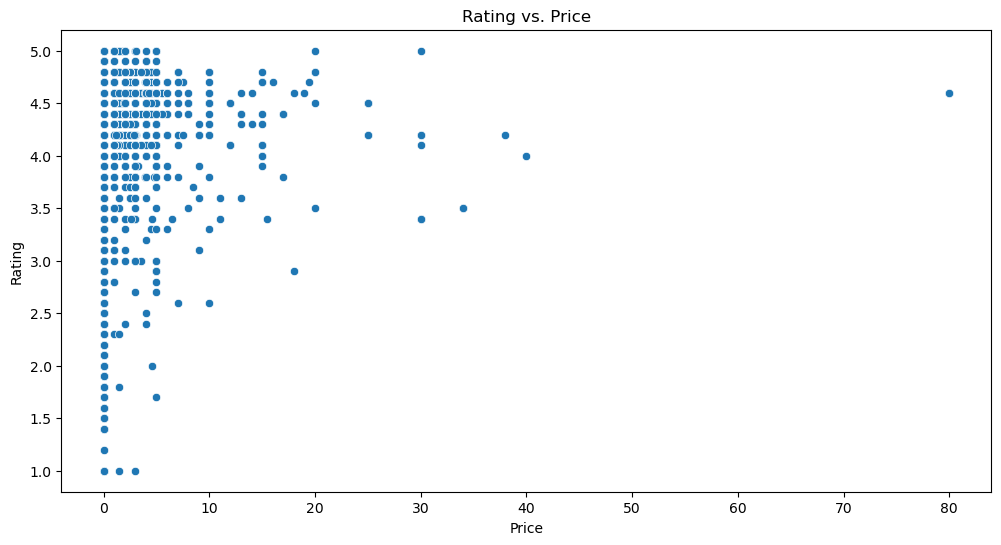

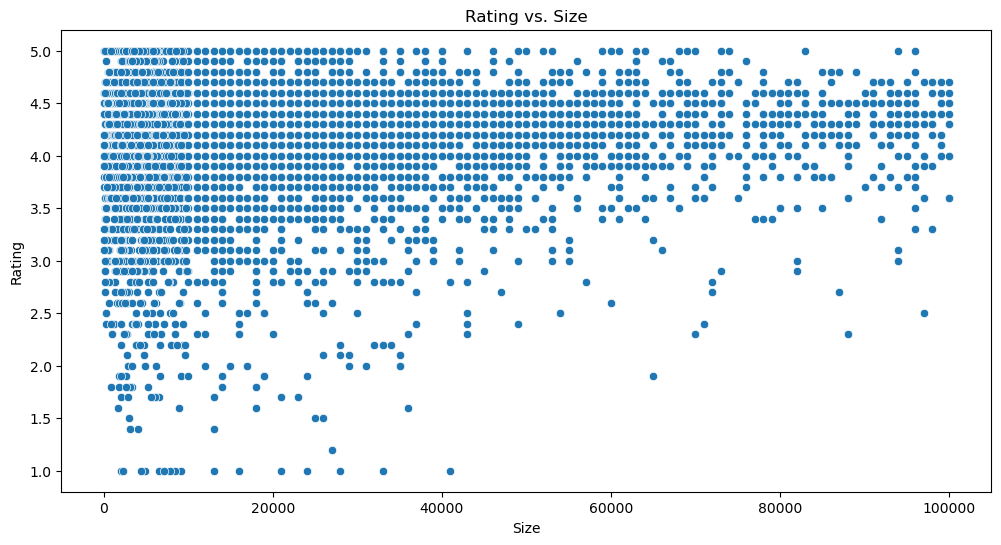

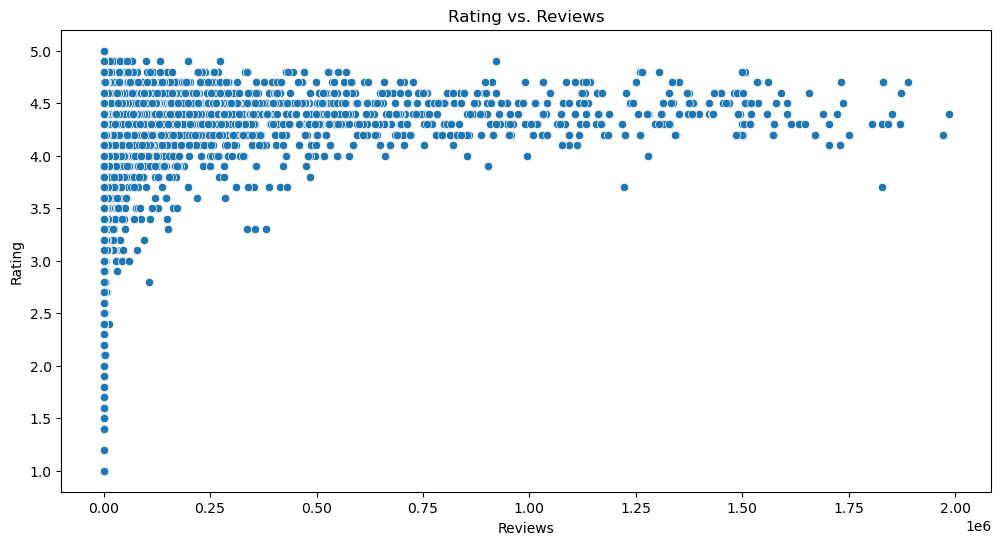

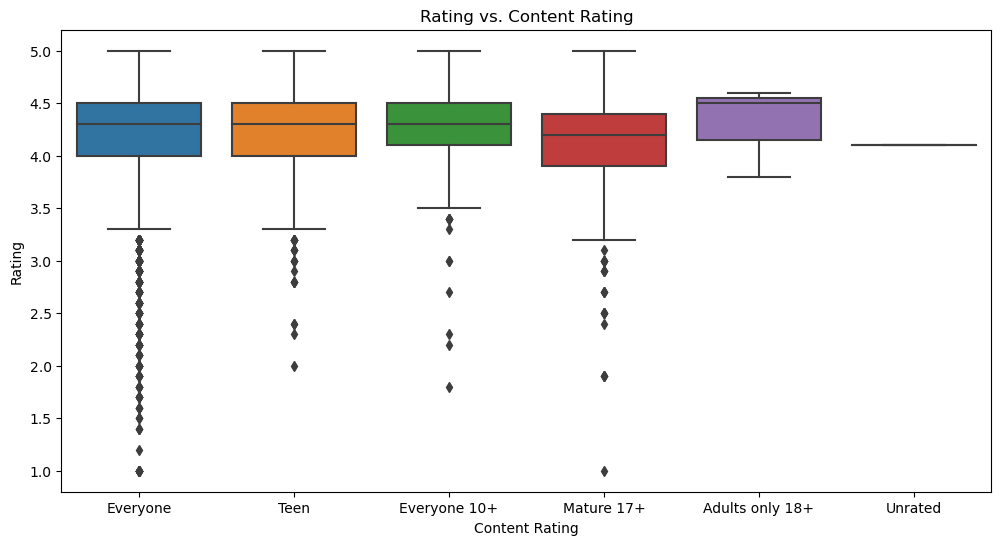

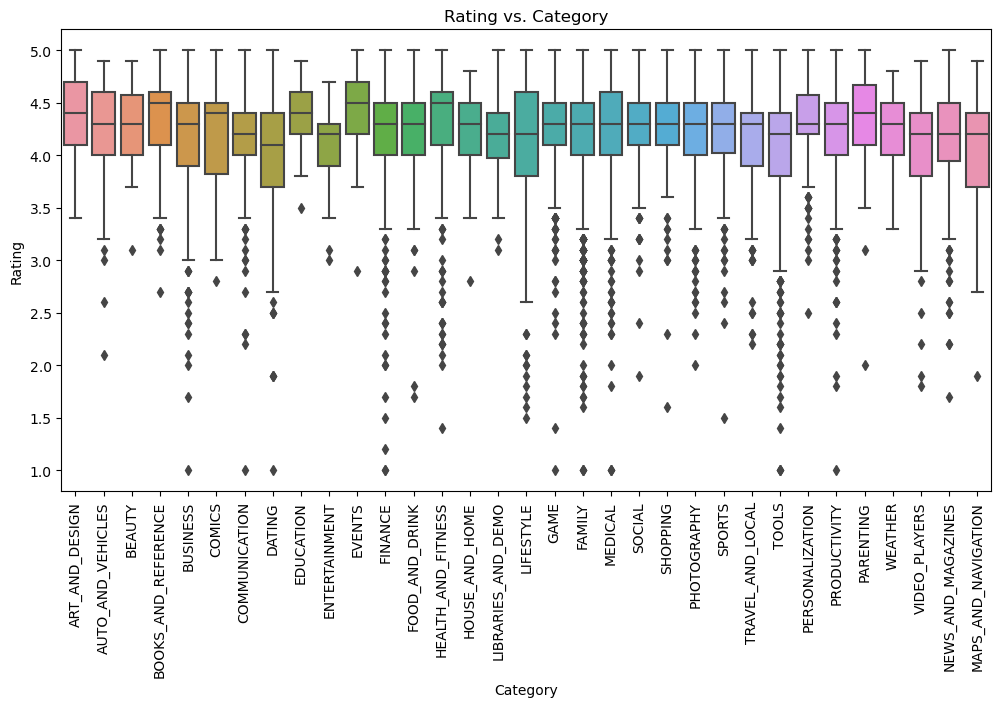

In [13]:
# Bivariate analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Rating', data=data)
plt.title('Rating vs. Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Rating', data=data)
plt.title('Rating vs. Size')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Rating vs. Reviews')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.title('Rating vs. Content Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Rating vs. Category')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Data preprocessing
inp1 = data.copy()
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'])


In [15]:
# Train-test split
X = inp2.drop(['Rating', 'App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
y = inp2['Rating']


In [16]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Model building
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [18]:
# Printing the coefficients and intercept of the linear regression model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [ 1.75930818e-01 -2.39114531e-07 -1.49719705e-01 -4.11370315e-02
 -1.05927278e-03 -1.97505169e-02  2.08643122e-03  1.00930415e-01
  7.66447200e-02 -2.66758387e-02  1.72622463e-01 -6.61699692e-02
 -1.05819756e-01  4.18767704e-03 -1.09842576e-01  1.58675006e-01
  3.47942313e-02 -3.98333296e-02 -3.62167046e-02  1.56098698e-01
 -1.27244484e-02 -1.66767544e-03  2.22867291e-02 -1.19682541e-01
 -7.13268394e-02  3.85839317e-02 -5.31514672e-02  4.26506887e-02
  5.04936837e-02 -4.74097590e-02 -1.70294280e-02  1.19880162e-03
 -8.79396568e-03 -4.93626094e-02 -7.11468076e-02 -1.50288349e-02
  3.47514252e-02 -2.43718351e-02 -2.24888766e-01 -4.69786480e-02
 -3.41437531e-01 -1.78368926e-01  1.61480476e-01 -3.23862132e-01
 -1.99889518e-01 -4.65990016e-02 -2.27595720e-15  3.50584902e-01
  4.08515273e-01  3.79618270e-02  2.08643122e-03  1.00930415e-01
 -2.12652821e-01 -1.48603775e-01 -1.27531959e-02  6.12917484e-01
  7.66447200e-02 -2.99517355e-14 -2.66758387e-02 -3.08176155e-01
 -9.5479180

In [19]:
# Report the R2 on the train set
train_preds = lr.predict(X_train)
train_r2 = r2_score(y_train, train_preds)
print(f"R2 on the train set: {train_r2}")

R2 on the train set: 0.16621814586906425


In [20]:
# Make predictions on test set and report R2
test_preds = lr.predict(X_test)
test_r2 = r2_score(y_test, test_preds)
print(f"R2 on the test set: {test_r2}")


R2 on the test set: 0.12947365331737481
